# HW2 Notebook
- **In this assignment when you are asked to provide an OpenMP parallel implementation to serial codes, you are expected to optimize your parallel code as much as possible using OpenMP constructs, directives and clauses we learned in class so far. Your goal is to make the programs run in the minimum runtime possible.**    
- **In this work you should run any program on the Intel DevCloud, on a CPU node with Intel® Xeon® Scalable 6128 processors.** \
To submit a job to such a node, we use: \
```qsub -l nodes=1:gold6128:ppn=2``` (we ask for allocation of 1 compute node with the property of gold6128). \
This is already made for you within the ```q``` file. \
You can interactively connect to such node from the terminal and print its specifications. \
To connect interactively: ```qsub -I -l nodes=1:gold6128:ppn=2```. \
Each node contains 192GB DRAM, and 2 Intel® Xeon® Scalable 6128 processors, each on a different socket. Each processor has 6 physical CPU cores, running 2 threads per core. Hence you can run up to 24 threads on a single node. Each socket serves as a different _NUMA_ node (hence you have 2 _NUMA_ nodes). \
With OpenMP, if you do not set the number of threads, it will use the number of logical cpu cores (which is 24). Sometimes, hyper-threading can reduce performance, and therefore you are encouraged to try running with different number of threads (usually you would like to consider having 12 threads,  i.e., 1 per each physical core). \
You are encouraged to check these specifications with ```lscpu```, ```numactl --hardware``` and ```cat /proc/cpuinfo``` commands on this dedicated hardware.
- **As in the previous assignment, the _.sh._ files include the compilation of the source files (we use the _icx_ compiler).** 
- **In this assignment we compile all the programs with -O0 (no additional optimizations by the compiler).**
- **Pay attention to keeping the timers wrapping the same work as the serial codes give.**

**Use this notebook to compile your files, submit your jobs to Intel DevCloud nodes and observe/analyze your results.**
## Submittion instructions
- **Publication Date: 14/12.**
- **Submission Date: 2/1**.
- **Submittion in groups of up to 2 students (individually or in pairs).** 
- **Submittion on the course website, in zip format including this directory with the relevant output, specifically:** 
  - the source files.
  - this notebook (run_hw2.ipynb) after executing all the cells. 
  - output files of queued jobs that might be created during the execution. 

### Fill the name and ID of the submitters:
#### Student Name: Manor Zvi Stdudent ID: 204030720

**Note:** If you submit in pairs, it is sufficient that only single student submit the assaignment on the course website. \
Remove one line if submitted individually, or keep it empty.

## Problem 1: Matrix Multiplication (10 points)

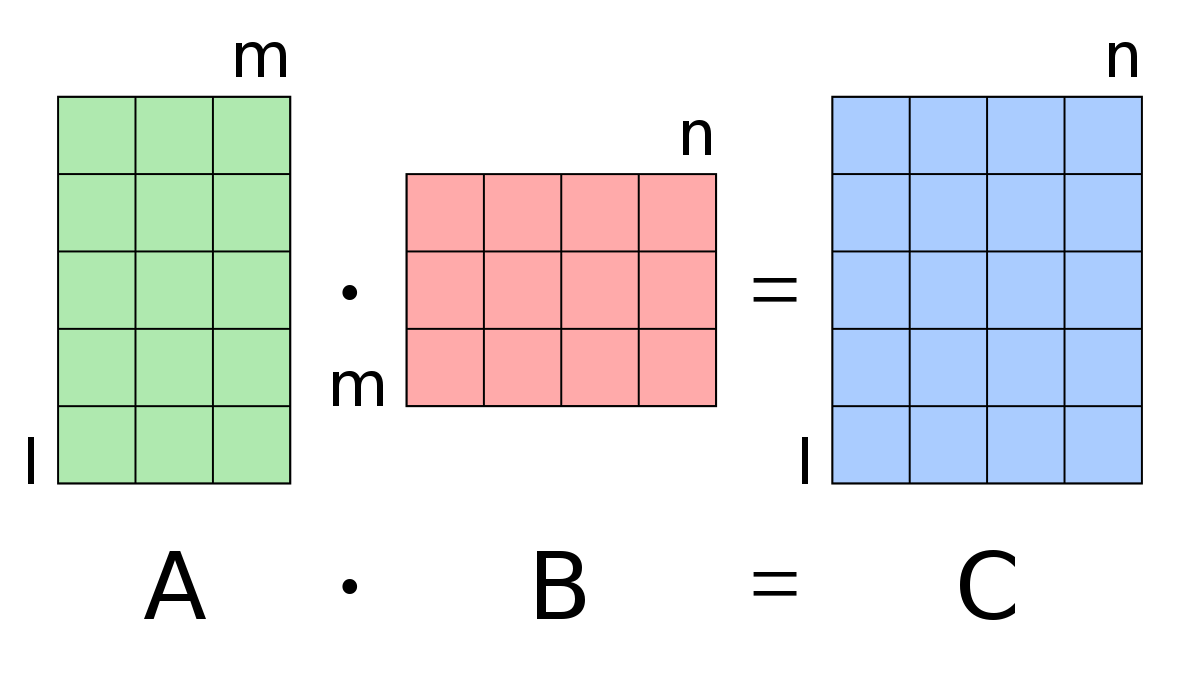


In [67]:
import os
os.chdir(os.path.expanduser('~')+'/cs236606/HW2/HW2/MatMul')

**Use the file _matmul_parallel.c_ to create an OpenMP implementation to the matrix multiplication problem defined in _matmul_serial.c_.** \
**Then, run the following cells:**

In [68]:
%pycat matmul_serial.c

/*
**  PROGRAM: Matrix Multiply
**
**  PURPOSE: This is a simple matrix multiply program. 
**           It will compute the product
**
**                C  = A * B
**
**           A and B are set to constant matrices so we
**           can make a quick test of the multiplication.
**  HISTORY: Written by Tim Mattson
*/
#include <malloc.h>
#include <stdio.h>
#include <omp.h>

#define ORDER 50
#define AVAL 3.0
#define BVAL 5.0
#define TOL  0.001

int main(int argc, char **argv)
{
    int Ndim, Pdim, Mdim;   /* A[N][P], B[P][M], C[N][M] */
    int i,j,k;
    double *A, *B, *C, cval, tmp, err, errsq;
    double start_time, run_time;

    Ndim = ORDER;
    Pdim = ORDER*100;
    Mdim = ORDER*100;

    A = (double *)malloc(Ndim*Pdim*sizeof(double));
    B = (double *)malloc(Pdim*Mdim*sizeof(double));
    C = (double *)malloc(Ndim*Mdim*sizeof(double));

    /* Initialize matrices */

    for (i=0; i<Ndim; i++)
        for (j=0; j<Pdim; j++)
            *(A+(i*Ndim+j)) = AVAL;

    for (i=0; i<P

In [ ]:
! chmod 755 ../q; chmod 755 run_matmul_serial.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_matmul_serial.sh; else ./run_matmul_serial.sh; fi

In [69]:
! cat run_matmul_serial.sh.o*


########################################################################
#      Date:           Sun 01 Jan 2023 11:05:31 AM PST
#    Job ID:           2111862.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=75:00:00,neednodes=1:gold6128:ppn=2,nodes=1:gold6128:ppn=2,walltime=06:00:00
########################################################################

 Order 50 multiplication in 9.968150 seconds 

 Hey, it worked
 all done 

########################################################################
# End of output for job 2111862.v-qsvr-1.aidevcloud
# Date: Sun 01 Jan 2023 11:05:54 AM PST
########################################################################



In [ ]:
%pycat matmul_parallel.c

In [ ]:
! chmod 755 ../q; chmod 755 run_matmul_parallel.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_matmul_parallel.sh; else ./run_matmul_parallel.sh; fi

In [70]:
! cat run_matmul_parallel.sh.o*


########################################################################
#      Date:           Sun 01 Jan 2023 05:43:45 AM PST
#    Job ID:           2111711.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=75:00:00,neednodes=1:gold6128:ppn=2,nodes=1:gold6128:ppn=2,walltime=06:00:00
########################################################################

 Running 1 threads ... Order 50 multiplication in 13.058045 seconds ... Hey, it worked ... all done
 Running 2 threads ... Order 50 multiplication in 6.821769 seconds ... Hey, it worked ... all done
 Running 4 threads ... Order 50 multiplication in 3.473057 seconds ... Hey, it worked ... all done
 Running 6 threads ... Order 50 multiplication in 2.293944 seconds ... Hey, it worked ... all done
 Running 8 threads ... Order 50 multiplication in 1.894199 seconds ... Hey, it worked ... all done
 Running 10 threads ... Order 50 multiplication in 1.352220 seconds ... Hey, it worked ... all done
 Running 12 th

I tried multiple threads count, using 1-level for construct and 2-level for construct.  
In both cases, I used default(none) clause because it is a good practice.  
In both cases, there are 4 private variables: i,j,k - the for loop iterators, and t - a temporary variable for accumulating the inner product.  
Since I used default(none), nothing is shared as a default, so i had to declare A,B,C,Ndim,Mdim,Pdim as shared.  
There is no point to use the schedule clause here, since the work is static (in terms of the amount of work per iteration) and predictable. Therefore, the default scheduler (static, ) fits the job.

Somewhat surprisingly, the best result is 24/22 threads, using 2-level for construct.  
Since there are 12 physical cores in the system (24 logical cores) and Matrix Multiplication is known as a relativly data-intensive workload, I expected the best performance to be achieved with ~12 threads, 1 on each physical core (where no 2 threads share the L2-L1 caches).  
Moreover, Matrix Multiplication is also known as 'embarrassingly parallel', means, extremly easy for parallelization. In such workloads, there is very few sync operations between threads, therefore the time spend on thread-to-thread comm is roughly negligible.

## Problem 2: LU (15 points)

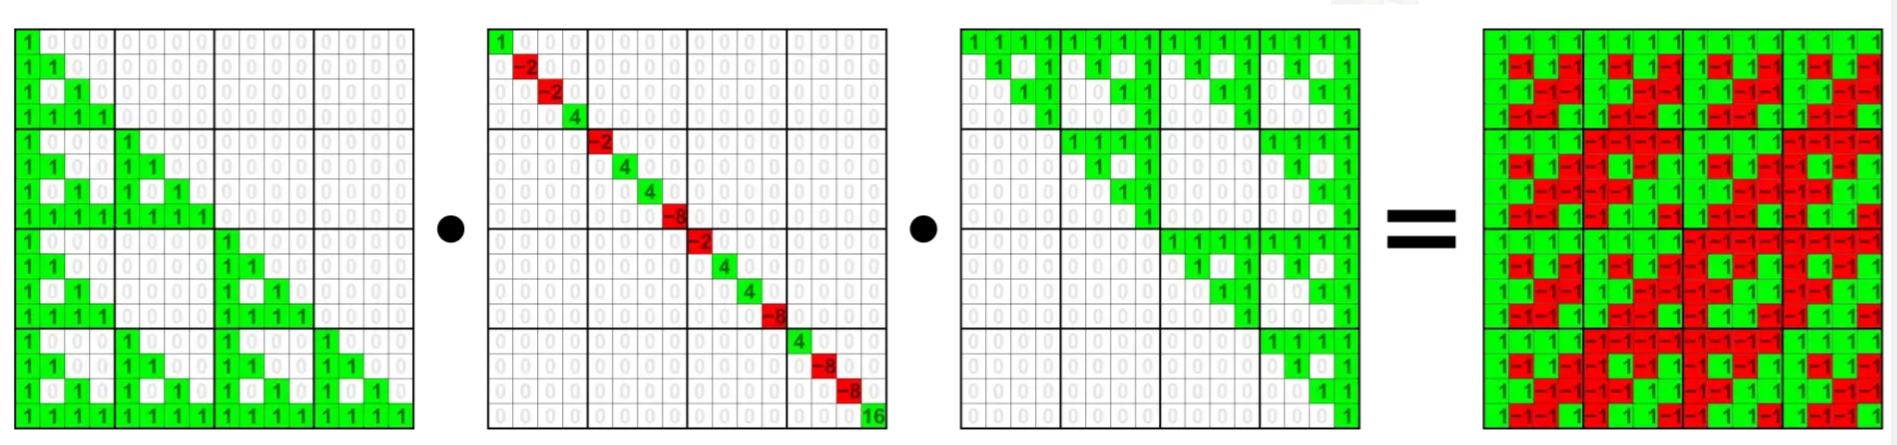

In numerical analysis and linear algebra, **lower–upper (LU)** decomposition or factorization factors a matrix as the product of a lower triangular matrix and an upper triangular matrix (see matrix decomposition).  

In [63]:
import os
os.chdir(os.path.expanduser('~')+'/cs236606/HW2/HW2/LU')

**Use the file _LU_parallel.c_ to create an OpenMP implementation to the LU serial solver defined in _LU_serial.c_.** \
**Then, run the following cells:**

In [64]:
%pycat LU_serial.c

#include<stdio.h>
#include<stdlib.h>
#include<malloc.h>
#include<math.h>
#include "omp.h"

void printMatrix(double **a,int n);//helper to print matrix


void *memset(void *str,int c, size_t t);//too many warnings...so you know.
void *memcpy(void *str1,const void *str2,size_t n);

int main(int argc, char **argv)
{
  int i,j,k,t;
  int n;
  int flag;
  double l1,u1;
  double **a;
  double **b;
  double **c;
  double start;
  double end;

  n=2000;
 
  a=(double **)malloc(sizeof(double *)*n);  
  b=(double **)malloc(sizeof(double *)*n);
  c=(double **)malloc(sizeof(double *)*n);
  
  for(i=0;i<n;i++){
    a[i]=(double *)malloc(sizeof(double)*n); 
    b[i]=(double *)malloc(sizeof(double)*n);
    c[i]=(double *)malloc(sizeof(double)*n);
   }
 

  for(i=0;i<n;i++){
    for(j=0;j<n;j++){
      a[i][j]=((rand()%10)+1);
    }
    memcpy((void *)b[i],(const void *)a[i],(size_t)(n*sizeof(double)));
  }
    
    start = omp_get_wtime();

  /*Perform LU decomposition*/
 for(k=0;k<n;k++){
    for(j=

In [ ]:
! chmod 755 ../q; chmod 755 run_LU_serial.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_LU_serial.sh; else ./run_LU_serial.sh; fi

In [65]:
! cat run_LU_serial.sh.o*


########################################################################
#      Date:           Wed 04 Jan 2023 05:13:13 AM PST
#    Job ID:           2114192.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=75:00:00,neednodes=1:gold6128:ppn=2,nodes=1:gold6128:ppn=2,walltime=06:00:00
########################################################################

Operation took 9.070039
Match

########################################################################
# End of output for job 2114192.v-qsvr-1.aidevcloud
# Date: Wed 04 Jan 2023 05:14:28 AM PST
########################################################################



In [66]:
%pycat LU_parallel.c

#include<stdio.h>
#include<stdlib.h>
#include<malloc.h>
#include<math.h>
#include "omp.h"

#define NELEMS(x) (sizeof(x)/sizeof((x)[0]))

void printMatrix(double **a,int n);//helper to print matrix


void *memset(void *str,int c, size_t t);//too many warnings...so you know.
void *memcpy(void *str1,const void *str2,size_t n);

int main(int argc, char **argv) {
    int i,j,k,t;
    int n;
    int flag;
    double l1,u1;
    double **a;
    double **b;
    double **c;
    double start;
    double end;
    
    int omp_threads[13] = {1,2,4,6,8,10,12,14,16,18,20,22,24};

    n=2000;
 
    a=(double **)malloc(sizeof(double *)*n);  
    b=(double **)malloc(sizeof(double *)*n);
    c=(double **)malloc(sizeof(double *)*n);
    
    for ( int x=0; x<NELEMS(omp_threads); x++ ) {
        int num_threads = omp_threads[x];
        omp_set_num_threads(num_threads);
  
        printf(" Running %d threads ...", num_threads);
        
        /* Initialize matrices */
        
        for(i=0;i<n;i++) {


In [ ]:
! chmod 755 ../q; chmod 755 run_LU_parallel.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_LU_parallel.sh; else ./run_LU_parallel.sh; fi

In [22]:
! cat run_LU_parallel.sh.o*


########################################################################
#      Date:           Mon 02 Jan 2023 12:02:42 AM PST
#    Job ID:           2112153.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=75:00:00,neednodes=1:gold6128:ppn=2,nodes=1:gold6128:ppn=2,walltime=06:00:00
########################################################################
#pragma omp parallel for collapse(2) default(none) private(i,j) shared(k,n,a)
########################################################################

 Running 1 threads ... Order 2000 Operation took 50.915853 seconds ... Match
 Running 2 threads ... Order 2000 Operation took 25.484875 seconds ... Match
 Running 4 threads ... Order 2000 Operation took 12.781573 seconds ... Match
 Running 6 threads ... Order 2000 Operation took 8.749367 seconds ... Match
 Running 8 threads ... Order 2000 Operation took 6.626944 seconds ... Match
 Running 10 threads ... Order 2000 Operation took 6.323932 seconds ... Match

I tired **multiple thread count**, **1-level for** and **2-level for** construct.
The outer k loop can't be parallelized easily, because inter-thread dependency (line 79: a[k][j]).  
So I pul the #omp pragma inside, to parallelize only the inner loops.  
The 2nd nested loop is dependent in the 1st loop results (could be solved perhaps), so I used two omp parallel regions.

Best results were acheived with **22-24 threads**, with **1-level for** construct.  
I think this is due to **False Sharing** in the 2-level for construct:  
a mtrix is a 2d array, means each row is stored continuously in memory.  
For the 2-level implementation, different threads update the same row.  
For example: thread 0 mapped to outer loop i=1 and inner loop j=1, so it is updating a[1,1] (row 1, col 1).  
Then another thread, say thread 1, mapped to outer loop  i=1, and inner loop j=2, so it is updating a[1,2] (row 1, col 2).
For the 1-level implementation, different threads always update different rows.

I tried also to eliminate the implicit barrier between the 1st parallel region and the 2nd parallel region.  
To do so, I removed the 2nd j'th loop, and noticed that under **static scheduling**, each thread is dependent only on its own part of a[k][j].  
So now all thread can continue independently after the Scaling phase.  
Weirdly, removing the barriar didn't improve performance but make it worse. I don't know why.

Eliminating the inter-iteration dependency allowed me also to try **nowait** clause.  
This allows each thread who finishes its work on the k'th iteration of the outer loop to continue to the next iteration.  
Even weirder, this also make the performance worse. I don't understand how removing constraints on the execution can made the execution time worse, giving that no implied memory affinity (or similar) is presented.


## Problem 3: The n-body problem (15 points)

In physics, the **n-body** problem is the problem of predicting the individual motions of a group of celestial objects interacting with each other gravitationally. Solving this problem has been motivated by the desire to understand the motions of the Sun, Moon, planets, and visible stars.

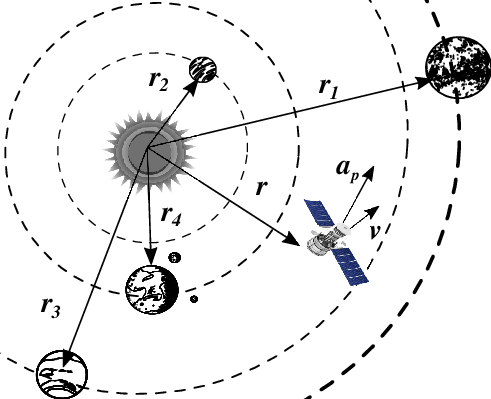

In [49]:
import os
os.chdir(os.path.expanduser('~')+'/cs236606/HW2/HW2/n-body')

**Use the file _n-body_parallel.c_ to create an OpenMP implementation to the n-body implementation defined in _n-body_serial.c_.** \
**Then, run the following cells:**

In [50]:
%pycat n-body_serial.c

#include <math.h>
#include <stdio.h>
#include <stdlib.h>
#include <omp.h>

#define SOFTENING 1e-9f

typedef struct { float x, y, z, vx, vy, vz; } Body;

void randomizeBodies(float *data, int n) {
  for (int i = 0; i < n; i++) {
    data[i] = 2.0f * (rand() / (float)RAND_MAX) - 1.0f;
  }
}

void bodyForce(Body *p, float dt, int n) {
  for (int i = 0; i < n; i++) { 
    float Fx = 0.0f; float Fy = 0.0f; float Fz = 0.0f;

    for (int j = 0; j < n; j++) {
      float dx = p[j].x - p[i].x;
      float dy = p[j].y - p[i].y;
      float dz = p[j].z - p[i].z;
      float distSqr = dx*dx + dy*dy + dz*dz + SOFTENING;
      float invDist = 1.0f / sqrtf(distSqr);
      float invDist3 = invDist * invDist * invDist;

      Fx += dx * invDist3; Fy += dy * invDist3; Fz += dz * invDist3;
    }

    p[i].vx += dt*Fx; p[i].vy += dt*Fy; p[i].vz += dt*Fz;
  }
}

int main(const int argc, const char** argv) {
  
  int nBodies = 20000;
  if (argc > 1) nBodies = atoi(argv[1]);

  const float dt = 0.01f; // ti

In [ ]:
! chmod 755 ../q; chmod 755 run_n-body_serial.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_n-body_serial.sh; else ./run_n-body_serial.sh; fi

In [51]:
! cat run_n-body_serial.sh.o*


########################################################################
#      Date:           Mon 02 Jan 2023 12:42:43 AM PST
#    Job ID:           2112191.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=75:00:00,neednodes=1:gold6128:ppn=2,nodes=1:gold6128:ppn=2,walltime=06:00:00
########################################################################

Execution time: 50.251829 seconds 

########################################################################
# End of output for job 2112191.v-qsvr-1.aidevcloud
# Date: Mon 02 Jan 2023 12:43:41 AM PST
########################################################################


########################################################################
#      Date:           Mon 02 Jan 2023 01:15:47 AM PST
#    Job ID:           2112216.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=75:00:00,neednodes=1:gold6128:ppn=2,nodes=1:gold6128:ppn=2,walltime=06:00:00
###################

In [52]:
%pycat n-body_parallel.c

#include <math.h>
#include <stdio.h>
#include <stdlib.h>
#include <omp.h>
#define SOFTENING 1e-9f

#define NELEMS(x) (sizeof(x)/sizeof((x)[0]))

void *memcpy(void *str1,const void *str2,size_t n);

typedef struct { float x, y, z, vx, vy, vz; } Body;

void randomizeBodies(float *data, int n) {
  for (int i = 0; i < n; i++) {
    data[i] = 2.0f * (rand() / (float)RAND_MAX) - 1.0f;
  }
}

void bodyForce(Body *p, float dt, int n) {
    #pragma omp parallel for default(none) shared(n,p,dt)
    for (int i = 0; i < n; i++) { 
        float Fx = 0.0f; float Fy = 0.0f; float Fz = 0.0f;

        for (int j = 0; j < n; j++) {
            float dx = p[j].x - p[i].x;
            float dy = p[j].y - p[i].y;
            float dz = p[j].z - p[i].z;
            float distSqr = dx*dx + dy*dy + dz*dz + SOFTENING;
            float invDist = 1.0f / sqrtf(distSqr);
            float invDist3 = invDist * invDist * invDist;

            Fx += dx * invDist3; Fy += dy * invDist3; Fz += dz * invDist3;
        }

In [ ]:
! chmod 755 ../q; chmod 755 run_n-body_parallel.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_n-body_parallel.sh; else ./run_n-body_parallel.sh; fi

In [53]:
! cat run_n-body_parallel.sh.o*


########################################################################
#      Date:           Mon 02 Jan 2023 03:15:58 AM PST
#    Job ID:           2112359.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=75:00:00,neednodes=1:gold6128:ppn=2,nodes=1:gold6128:ppn=2,walltime=06:00:00
########################################################################
20:#pragma omp parallel for default(none) shared(n,p,dt)
124:#pragma omp parallel for default(none) shared(nBodies,p,dt)
########################################################################

 Running 1 threads ... 10 iterations X 20000 bodies operation took 56.559055 seconds ... Yippee Ki-Yay M*th*rf*ck*r It worked!
 Running 2 threads ... 10 iterations X 20000 bodies operation took 28.440918 seconds ... Yippee Ki-Yay M*th*rf*ck*r It worked!
 Running 4 threads ... 10 iterations X 20000 bodies operation took 14.256872 seconds ... Yippee Ki-Yay M*th*rf*ck*r It worked!
 Running 6 threads ... 10 iteration

I was wondering if the allocation on the heap (using malloc) rather than on the stack (during compilation) impacts performance.  
The answer seems to be NO:

In [ ]:
! chmod 755 ../q; chmod 755 run_n-body_parallel_on_stack.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_n-body_parallel_on_stack.sh; else ./run_n-body_parallel_on_stack.sh; fi

In [54]:
! cat run_n-body_parallel_on_stack.sh.o*


########################################################################
#      Date:           Mon 02 Jan 2023 09:28:43 AM PST
#    Job ID:           2112595.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=75:00:00,neednodes=1:gold6128:ppn=2,nodes=1:gold6128:ppn=2,walltime=06:00:00
########################################################################

 Running 1 threads ... 10 iterations X 20000 bodies operation took 56.562434 seconds ... Yippee Ki-Yay M*th*rf*ck*r It worked!
 Running 2 threads ... 10 iterations X 20000 bodies operation took 28.446723 seconds ... Yippee Ki-Yay M*th*rf*ck*r It worked!
 Running 4 threads ... 10 iterations X 20000 bodies operation took 14.235707 seconds ... Yippee Ki-Yay M*th*rf*ck*r It worked!
 Running 6 threads ... 10 iterations X 20000 bodies operation took 9.536500 seconds ... Yippee Ki-Yay M*th*rf*ck*r It worked!
 Running 8 threads ... 10 iterations X 20000 bodies operation took 7.299819 seconds ... Yippee Ki-Yay M

Seems there might be a problem of potential False Sharing in the function bodyForce.  
The p array is array of Body objects. Each Body object contains 6 floats, therefore takes continuous 24[B].  
Each cache line is 64[B].
I parallelized the outer loop (line 21) to threads, therfore each thread writes to different Body object vx, vy and vz attributes.  
For example, thread 0 writes to Body object i=0 (address 0,4,8) and thread 1 writes to Body object i=1 (address 24,28,32).  
In the inner loop, each thread reads all other threads x, y and z attributes.  
For example, thread 0 reads Body object j=1 (address 36,40,44) and thread 1 reads Body object j=0 (address 12,16,20).  
If both Body object 0 and Body object 1 are located on the same cache line, these two threads will slow down each other while the system maintains cache coherence between the cores they are running on.

So I created a version with 2D Body objects array, to make sure each Body object exclusively populate a single cache line.

In [ ]:
! chmod 755 ../q; chmod 755 run_n-body_parallel_v2.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_n-body_parallel_v2.sh; else ./run_n-body_parallel_v2.sh; fi

In [55]:
! cat run_n-body_parallel_v2.sh.o*


########################################################################
#      Date:           Mon 02 Jan 2023 10:40:07 AM PST
#    Job ID:           2112635.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=75:00:00,neednodes=1:gold6128:ppn=2,nodes=1:gold6128:ppn=2,walltime=06:00:00
########################################################################

 Running 1 threads ... 10 iterations X 20000 bodies operation took 62.147149 seconds ... Yippee Ki-Yay M*th*rf*ck*r It worked!
 Running 2 threads ... 10 iterations X 20000 bodies operation took 31.397027 seconds ... Yippee Ki-Yay M*th*rf*ck*r It worked!
 Running 4 threads ... 10 iterations X 20000 bodies operation took 15.616870 seconds ... Yippee Ki-Yay M*th*rf*ck*r It worked!
 Running 6 threads ... 10 iterations X 20000 bodies operation took 10.525906 seconds ... Yippee Ki-Yay M*th*rf*ck*r It worked!
 Running 8 threads ... 10 iterations X 20000 bodies operation took 7.880838 seconds ... Yippee Ki-Yay 

Looks like it didn't really work. The regular version is faster.  
Perhaps it is because of the pointer irregularity (2D array of pointers - consecutive elements are not continuous in memory).  
It could harm the efficiency of the CPU to do data prefetching...  

Let's check the on_stack version of it:

In [ ]:
! chmod 755 ../q; chmod 755 run_n-body_parallel_on_stack_v2.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_n-body_parallel_on_stack_v2.sh; else ./run_n-body_parallel_on_stack_v2.sh; fi

In [56]:
! cat run_n-body_parallel_on_stack_v2.sh.o*


########################################################################
#      Date:           Mon 02 Jan 2023 11:11:19 AM PST
#    Job ID:           2112668.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=75:00:00,neednodes=1:gold6128:ppn=2,nodes=1:gold6128:ppn=2,walltime=06:00:00
########################################################################

 Running 1 threads ... 10 iterations X 20000 bodies operation took 57.532863 seconds ... Yippee Ki-Yay M*th*rf*ck*r It worked!
 Running 2 threads ... 10 iterations X 20000 bodies operation took 28.835013 seconds ... Yippee Ki-Yay M*th*rf*ck*r It worked!
 Running 4 threads ... 10 iterations X 20000 bodies operation took 14.431364 seconds ... Yippee Ki-Yay M*th*rf*ck*r It worked!
 Running 6 threads ... 10 iterations X 20000 bodies operation took 9.634445 seconds ... Yippee Ki-Yay M*th*rf*ck*r It worked!
 Running 8 threads ... 10 iterations X 20000 bodies operation took 7.230859 seconds ... Yippee Ki-Yay M

Nop. This one didn't work better either.  
Well, atleast I can't say I didn't try...

## Problem 4: 2-Dimensional Shallow-Water Equations (20 points)
The **shallow-water equations (SWE)** are a set of hyperbolic partial differential equations (or parabolic if viscous shear is considered) that describe the flow below a pressure surface in a fluid (sometimes, but not necessarily, a free surface).

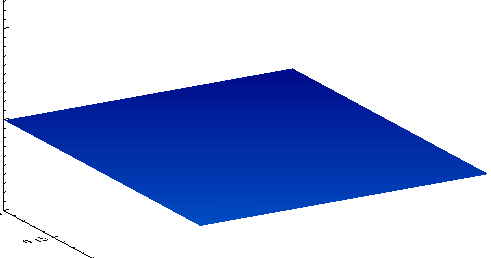
** Output from a shallow-water equation model of water in a bathtub.


In [45]:
import os
os.chdir(os.path.expanduser('~')+'/cs236606/HW2/HW2/shwater')

**Use the file _shwater2d_parallel.c_ to create an OpenMP implementation to the LU serial solver defined in _shwater2d_serial.c_.** \
**Then, run the following cells:**

In [48]:
%pycat shwater2d_serial.c

/*
 *  shwater2d.c solves the two dimensional shallow water equations 
 *  using the Lax-Friedrich's scheme
 */

#include <stdlib.h>
#include <stdio.h>
#include <math.h>
#include <sys/time.h>
#include <omp.h>

#define cell_size 3
#define xstart 0.0
#define ystart 0.0
#define xend 4.0
#define yend 4.0

#define Q(i, j, k) Q[((k) + n * ((j) + m * (i)))]


/* Check that the solution is finite */
void validate(double *Q, int m, int n) {
  int i, j, k;
  for (i = 0; i < n; i++) 
    for (j = 0; j < m; j++) 
      for (k = 0; k < cell_size;  k++)
    if (!isfinite(Q(k, j, i))) {
      fprintf(stderr, "Invalid solution of serial solver\n");
      exit(-1);
    }
}

void print(double *Q, int m, int n) {
    int i, j, k;
    printf("Q=\n");
    for (k = 0; k < cell_size;  k++) {
        printf("[\n");
        for (i = 0; i < n; i++) {
            printf("\t[");
            for (j = 0; j < m; j++) {
                if (Q(k, j, i) < 0) printf("%.3f,", Q(k, j, i));
                else printf("%.4f

In [ ]:
! chmod 755 ../q; chmod 755 run_shwater_serial.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_shwater_serial.sh; else ./run_shwater_serial.sh; fi

In [28]:
! cat run_shwater_serial.sh.o*


########################################################################
#      Date:           Tue 03 Jan 2023 10:43:17 AM PST
#    Job ID:           2113295.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=75:00:00,neednodes=1:gold6128:ppn=2,nodes=1:gold6128:ppn=2,walltime=06:00:00
########################################################################

icx -O0 -fopenmp -c shwater2d_serial.c
icx -O0 -fopenmp vtk_export.o shwater2d_serial.o -o bin/shwater2d_serial -lm	
Serial Solver took 32.8913 seconds

########################################################################
# End of output for job 2113295.v-qsvr-1.aidevcloud
# Date: Tue 03 Jan 2023 10:44:00 AM PST
########################################################################



In [47]:
%pycat shwater2d_parallel.c

/*
 *  shwater2d.c solves the two dimensional shallow water equations 
 *  using the Lax-Friedrich's scheme
 */

#include <stdlib.h>
#include <stdio.h>
#include <math.h>
#include <sys/time.h>
#include <omp.h>

#define cell_size 3
#define xstart 0.0
#define ystart 0.0
#define xend 4.0
#define yend 4.0

#define Q(i, j, k) Q[((k) + n * ((j) + m * (i)))]
#define NELEMS(x) (sizeof(x)/sizeof((x)[0]))


/* Check that the solution is finite */
void validate(double *Q, int m, int n) {
    int i, j, k;
    for (i = 0; i < n; i++) 
        for (j = 0; j < m; j++) 
            for (k = 0; k < cell_size;  k++)
                if (!isfinite(Q(k, j, i))) {
                    fprintf(stderr, "Invalid solution of parallel solver\n");
                    exit(-1);
                }
}

void print(double *Q, int m, int n) {
    int i, j, k;
    printf("Q=\n");
    for (k = 0; k < cell_size;  k++) {
        printf("[\n");
        for (i = 0; i < n; i++) {
            printf("\t[");
            for (j = 0;

In [ ]:
! chmod 755 ../q; chmod 755 run_shwater_parallel.sh;if [ -x "$(command -v qsub)" ]; then ./../q run_shwater_parallel.sh; else ./run_shwater_parallel.sh; fi

In [46]:
! cat run_shwater_parallel.sh.o*


########################################################################
#      Date:           Tue 03 Jan 2023 10:47:07 AM PST
#    Job ID:           2113296.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=75:00:00,neednodes=1:gold6128:ppn=2,nodes=1:gold6128:ppn=2,walltime=06:00:00
########################################################################

icx -O0 -fopenmp -c shwater2d_parallel.c
icx -O0 -fopenmp vtk_export.o shwater2d_parallel.o -o bin/shwater2d_parallel -lm	
 Running 1 threads ... Order 1002,1002 Solver took 32.854230 seconds ...Validating ...Works!
 Running 2 threads ... Order 1002,1002 Solver took 16.732970 seconds ...Validating ...Works!
 Running 4 threads ... Order 1002,1002 Solver took 8.518195 seconds ...Validating ...Works!
 Running 6 threads ... Order 1002,1002 Solver took 5.750875 seconds ...Validating ...Works!
 Running 8 threads ... Order 1002,1002 Solver took 4.415305 seconds ...Validating ...Works!
 Running 10 threads ... O

## Problem 5: First Touch (20 points)

The **First Touch** placement policy allocates the data page in the memory closest to the thread accessing this page for the first time. This policy is the default on Linux and other OSes, and makes sense because it is the right thing to do for a sequential application.

In [1]:
import os
os.chdir(os.path.expanduser('~')+'/cs236606/HW2/HW2/FirstTouch')

**In this exercise we will demonstrate the effect of thread and memory affinity in a multi-NUMA system.** \
In this exercise we demonstrate how NUMA-aware programing is important. In this problem, you need to check for the performance of a simple computation (**DAXPY**, i.e., **double precision aX+Y**), using varying number of threads and with different thread and memory affinity options. 

**Use the file _FirstTouch.c_ to execute, and fill the relevant results on the following graph.** 
- The code section in **1a** initializes the data using one single thread (the main thread). 
- The code section in **1b** initializes the data using all the threads (each initializes the part it will work on - later). 
- Use the macro **#define NTHREADS** to easily tune the numebr of threads. 
- Set the environment variable **OMP_PROC_BIND** to change OpenMP thread binding policy (close or spread). You can easily set the value of this variable with the export command (see in the _run.c_ file).  
- Uncomment the relevant part of initialization (1a or 1b) in the file to test the relevant parts. 
- Use the following cell to run easily (You also may create an automatic script to run all the permutations if it is easier to you).

In [ ]:
! chmod 755 ../q; chmod 755 run.sh;if [ -x "$(command -v qsub)" ]; then ../q run.sh; else ./run.sh; fi

In [12]:
! echo "--------------------------------------"
! echo "Closing Binding Policy, No First Touch"
! echo "--------------------------------------"
! grep "Master thread init.*binding policy is 3" run.sh.o2113976

! echo "----------------------------------------"
! echo "Closing Binding Policy, With First Touch"
! echo "----------------------------------------"
! grep "First touch init.*binding policy is 3" run.sh.o2113976

! echo "-------------------------------------"
! echo "Spread Binding Policy, No First Touch"
! echo "-------------------------------------"
! grep "Master thread init.*binding policy is 4" run.sh.o2113976

! echo "---------------------------------------"
! echo "Spread Binding Policy, With First Touch"
! echo "---------------------------------------"
! grep "First touch init.*binding policy is 4" run.sh.o2113976



--------------------------------------
Closing Binding Policy, No First Touch
--------------------------------------
Number of threads 1 Master thread init Execution time: 6.930531 seconds OpenMP threads binding policy is 3 
Number of threads 2 Master thread init Execution time: 3.444151 seconds OpenMP threads binding policy is 3 
Number of threads 4 Master thread init Execution time: 1.919107 seconds OpenMP threads binding policy is 3 
Number of threads 6 Master thread init Execution time: 1.727893 seconds OpenMP threads binding policy is 3 
Number of threads 8 Master thread init Execution time: 2.052601 seconds OpenMP threads binding policy is 3 
Number of threads 10 Master thread init Execution time: 2.225294 seconds OpenMP threads binding policy is 3 
Number of threads 12 Master thread init Execution time: 2.382486 seconds OpenMP threads binding policy is 3 
Number of threads 14 Master thread init Execution time: 2.514802 seconds OpenMP threads binding policy is 3 
Number of thread

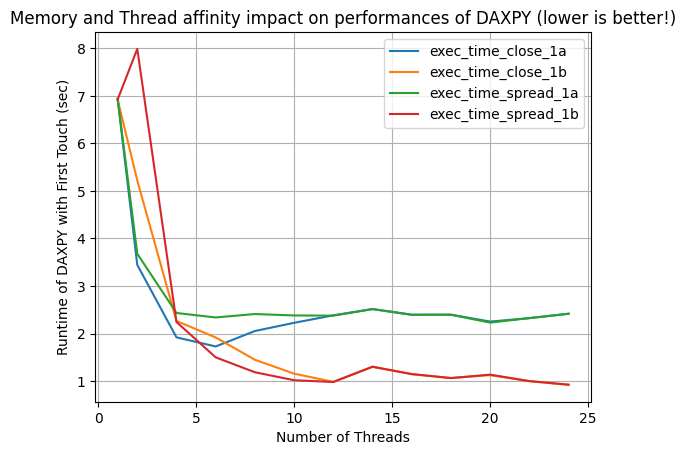

In [16]:
import matplotlib.pyplot as plt
threads = [1,2,4,6,8,10,12,14,16,18,20,22,24]
time_close_1a = [
    6.930531, 
    3.444151, 
    1.919107, 
    1.727893, 
    2.052601, 
    2.225294,
    2.382486,
    2.514802,
    2.397622,
    2.396417,
    2.251343,
    2.322453,
    2.415512
]
time_close_1b = [
    6.920628,
    5.220570,
    2.264033,
    1.917035,
    1.447589,
    1.154887,
    0.983194,
    1.302303,
    1.145025,
    1.064861,
    1.124531,
    0.999982,
    0.918527
]
time_spread_1a = [
    6.937758, 
    3.678349, 
    2.431789, 
    2.337935, 
    2.409866, 
    2.379955,
    2.376433,
    2.513479,
    2.391923,
    2.395064,
    2.229030,
    2.325186,
    2.416347
]
time_spread_1b = [
    6.924983,
    7.987443,
    2.241788,
    1.498533,
    1.185010,
    1.017496,
    0.980252,
    1.300324,
    1.146554,
    1.061790,
    1.134956,
    0.997975,
    0.924546
]


plt.plot(threads, time_close_1a, label = "exec_time_close_1a")
plt.plot(threads, time_close_1b, label = "exec_time_close_1b")
plt.plot(threads, time_spread_1a, label = "exec_time_spread_1a")
plt.plot(threads, time_spread_1b, label = "exec_time_spread_1b")

# naming the x axis
plt.xlabel('Number of Threads')
# naming the y axis
plt.ylabel('Runtime of DAXPY with First Touch (sec)')
# giving a title to my graph
plt.title('Memory and Thread affinity impact on performances of DAXPY (lower is better!)')
plt.grid()
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

**Explain the results in the following cell. Focus on the differences between the various trends.**

* For both cases No First Touch and First Touch, we see convergence for the binding method (Close & Spread) for higher thread count than 12.
    * This makes sense, since we have 24 logical cores in the system. For more than 12 threads, physical cores from both sockets necessarily get work.  
    * While the DAXPY is not very memory nor compute heavy, it is also light in synchronization between threads.
    * So there are not much benefits nor drawbacks from puting threads on the same physical core or spreading them between different cores.
    * To conclude this part, given a thread count that requires using both NUMA nodes, there's not much difference between Close and Spread biniding policies.
* We also see for all cases no speedup from more threads than 12. 
    * I think this is becase the bottleneck moved from compute/memory bandwidth to socket-to-socket (QPI) interconnect. In other words, all other latencies 'are hidden' behind this latency.
* Last, we see that for more threads than ~6 first touch is faster than no first touch in ~50%. 
    * It makes sense, since the memory affinitiy is assigned per thread in its closest hierarchy (local cache than local L3 cache than local NUMA).
    * Therefore, much time on reading and writing to remote NUMA memory location is saved.

## Problem 6: Stencil Computation with Tasks (20 points)

In [43]:
import os
os.chdir(os.path.expanduser('~')+'/cs236606/HW2/HW2/Gauss-Seidel')

In this exercise we adress a 2D example of **stencil computation**. In this example, each cell depends on 4 neighbors (left, top, right, bottom). Each cell depends on two cells that are computed in the current time step (left, top), and two cells that were computed in the previous time step (right, bottom). The following figure illustrates this pattern on computation.

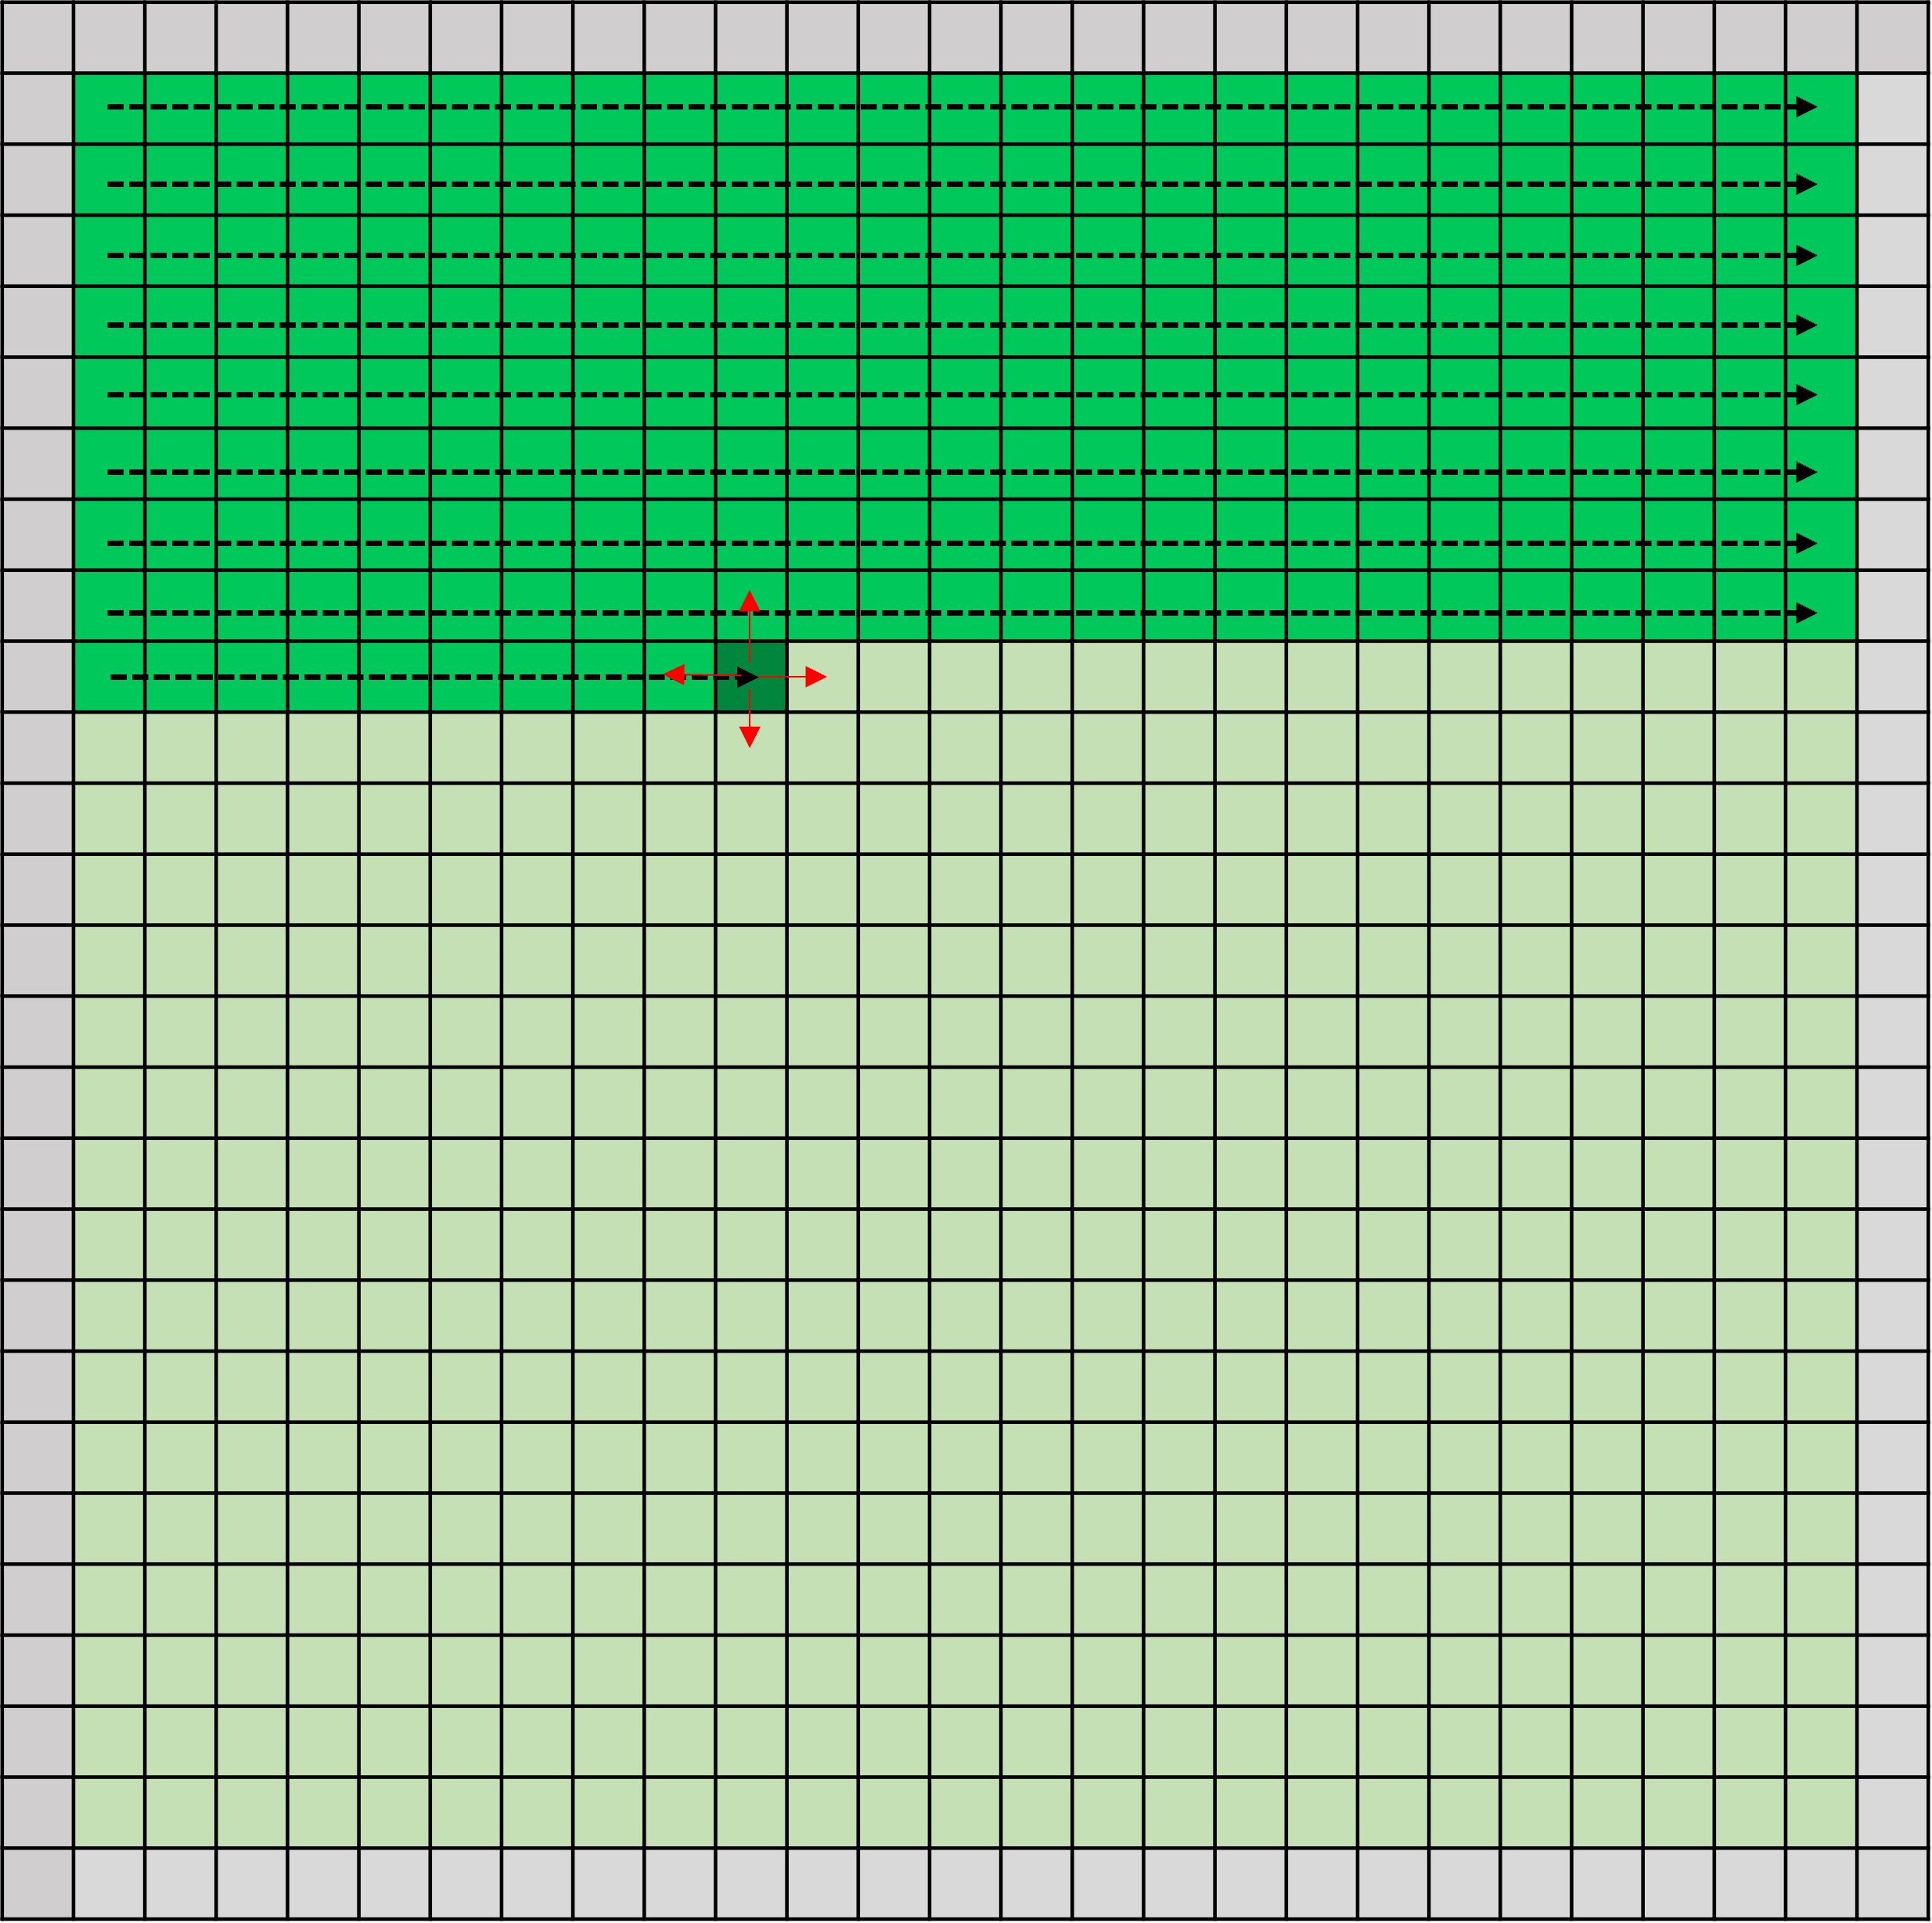

The following serial code (in _GS_serial.c_) computes the mentioned stencil probem on a grid of size 6002x6002 over 100 time steps (as you can see, the borders are not updated during the computation). \
**Run the following cells to see the performance of the serial execution.**

In [42]:
%pycat GS_serial.c

#include <omp.h>
#include <assert.h>
#include <stdlib.h>
#include <stdio.h>
#include <math.h>

void printMatrix(double **a,int n);//helper to print matrix

void gauss_seidel(int tsteps, int size, double **p) {
   for (int t = 0; t < tsteps; ++t) {
      for (int i = 1; i < size-1; ++i) {
         for (int j = 1; j < size-1; ++j) {
                          p[i][j] = 0.2*p[i][j-1] + 
                                    0.3*p[i][j+1] +
                                    0.1*p[i-1][j] + 
                                    0.4*p[i+1][j];
         }
      }
   }
}


int main(){ 
    
  double **p;
  int size = 6002;
//   int size = 52;
  int tsteps = 100;
//   int tsteps = 3;
  int i,j;
  double start;
  p=(double **)malloc(sizeof(double *)*size);  
  
  for(i=0;i<size;i++){
    p[i]=(double *)malloc(sizeof(double)*size); 
   }
 

  for(i=0;i<size;i++){
    for(j=0;j<size;j++){
      p[i][j]=(0.05*i+0.04*j);
    }
  }
     
   start = omp_get_wtime();
   gauss_seidel(tsteps, size, p);

  

In [ ]:
! chmod 755 ../q; chmod 755 run_GS_serial.sh;if [ -x "$(command -v qsub)" ]; then ../q run_GS_serial.sh; else ./run_GS_serial.sh; fi

In [41]:
! cat run_GS_serial.sh.o2114140


########################################################################
#      Date:           Wed 04 Jan 2023 04:26:40 AM PST
#    Job ID:           2114140.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=75:00:00,neednodes=1:gold6128:ppn=2,nodes=1:gold6128:ppn=2,walltime=06:00:00
########################################################################

Serial Execution time: 20.665174 sec 
sum = 9825298683.981915 
correct answer

########################################################################
# End of output for job 2114140.v-qsvr-1.aidevcloud
# Date: Wed 04 Jan 2023 04:27:09 AM PST
########################################################################



Parallelization of a stencil computation might be non-trivial. One way to insert some sort of parallelism in a more natural way is by using OpenMP tasks. \
**Edit the file _GS_tasks_parallel.c_ to insert OpenMP tasks to the function _gauss_seidel_. In this part of the problem you are requested to create one task per each update of ```p[i][j]```. This can be done without any changes in the code (except adding OpenMP pragma directives).** \
Hint: be aware of dependences between different tasks you create.

In [40]:
%pycat GS_tasks_parallel.c


void gauss_seidel(int tsteps, int size, double **p) {
      #pragma omp parallel shared(p)
      {
      // One thread create the tasks
      // The single thread will wait on the pragma omp parallel implicit barrier
      #pragma omp single nowait
      {
      for (int t = 0; t < tsteps; ++t) {
         for (int i = 1; i < size-1; ++i) {
            for (int j = 1; j < size-1; ++j) {   
               //create a different task for each update
               //#pragma omp taskwait
               // Each task is dependent on the output of its left task and the output of its upper task. Also, its bottom and right tasks will be dependent on it.
               #pragma omp task depend(inout:p[i][j-1],p[i-1][j])
               p[i][j] = 0.25 * (p[i][j-1] + // left
                                 p[i][j+1] + // right
                                 p[i-1][j] + // top
                                 p[i+1][j]); // bottom
            }
         }
      }
      }
      }
   }
}

*** ERROR: 

You are not requested to execute this implementation, because running this parallel implementation on the previous problem (6002x6002 grid over 100 time steps) may take long long time... \
**Can you guess why?**

Similar to the claim we sawe in the lecture (also in the book) about swamping the system with tasks when calculating PI recursivly with 1 iteration in each leaf node.  
Here, we do one iteration of p[i,j] per task, and worse than the PI example, it is dependent in all previous tasks.  
So we have way too many tasks, which adds significant overhead on the computations and leads to very slow execution.

To create a much more efficient parallel implementation, we will try to insert more work into each task, ending up with much fewer number of tasks. The following figure illustrates that each task now updates an entire block of values in the grid. Each block is of size _TSxTS_.

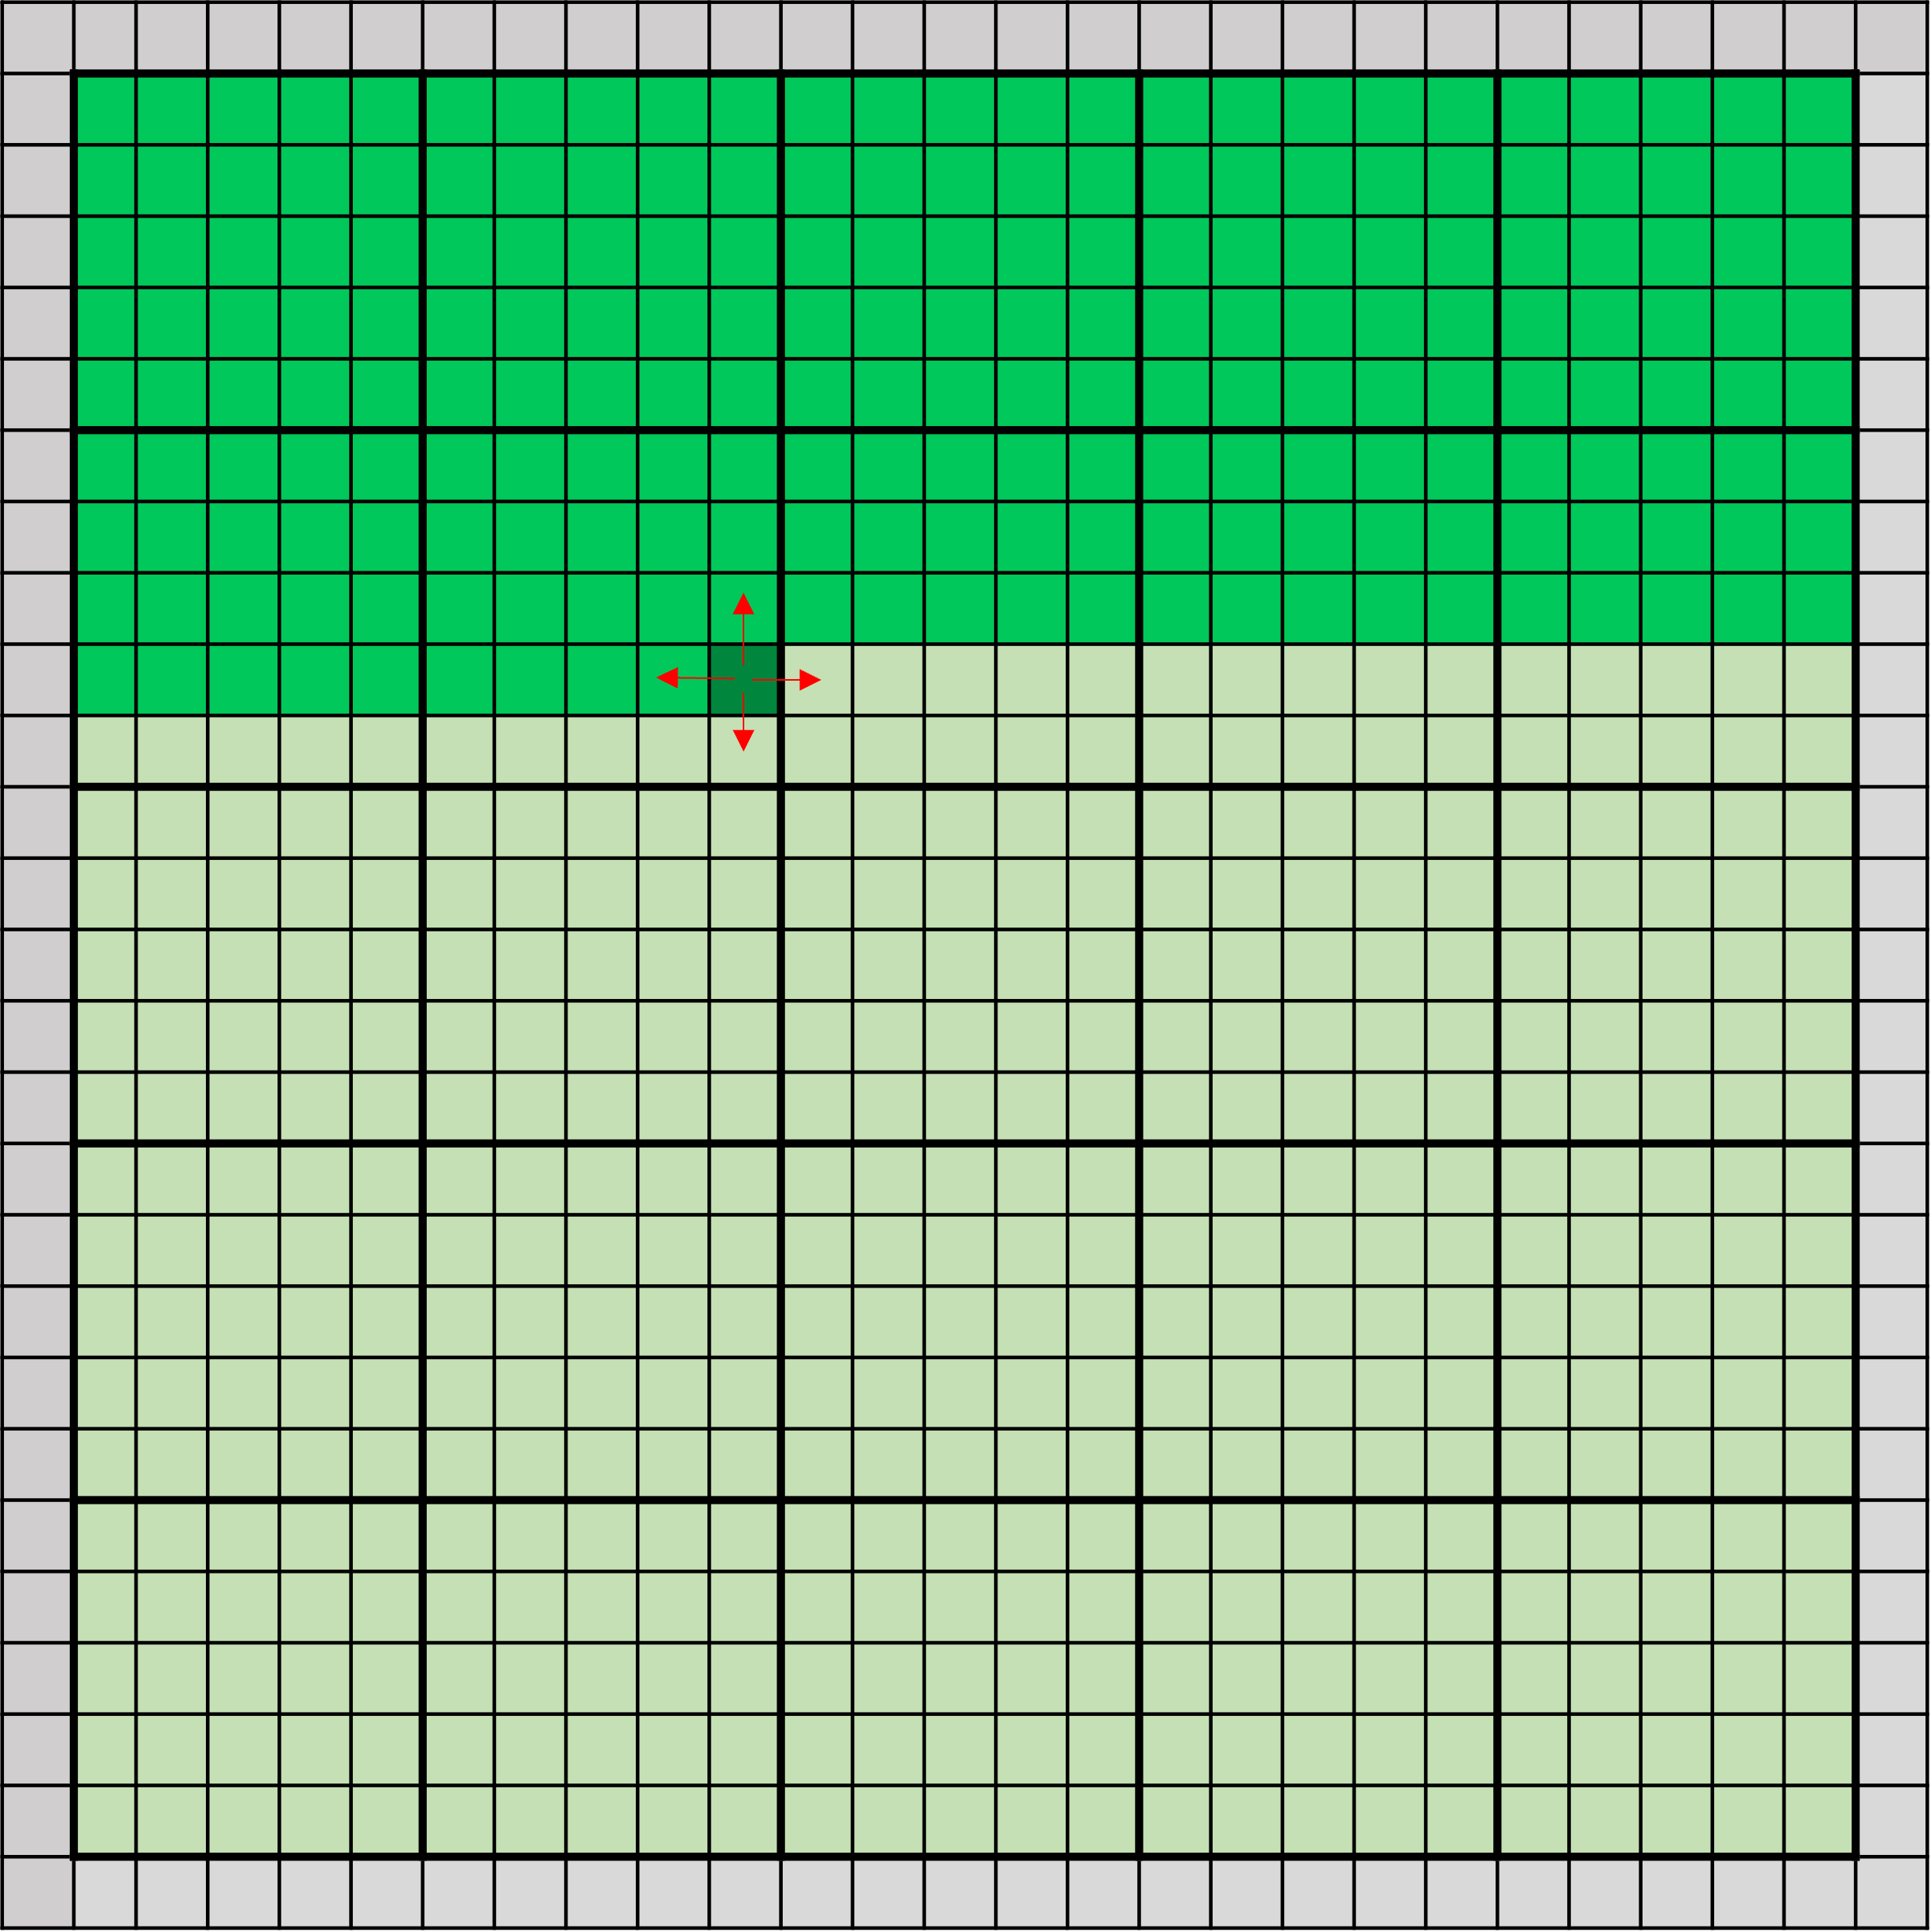

**Edit the file _GS_tasks_blocks_parallel.c_ to create a task-based parallel version based on blocks of updates. You may change the code as long as you need to. Again, be aware of task dependences that should be addressed. Tune the number of threads (NTHREADS) and the size of the block (TS) to achieve better performances.** \
Note: the block size (TS) must be chosen such that the whole grid (without the borders) is divided perfectly into such blocks. In our exmaple, TS should divide the number 6000. \
**Then, run the following cells:**

In [39]:
%pycat GS_tasks_blocks_parallel.c

#include <omp.h>
#include <assert.h>
#include <stdlib.h>
#include <stdio.h>
#include <math.h>
#define NTHREADS 12

void printMatrix(double **a,int n);//helper to print matrix

void gauss_seidel_serial(int tsteps, int size, double **p) {
   for (int t = 0; t < tsteps; ++t) {
      for (int i = 1; i < size-1; ++i) {
         for (int j = 1; j < size-1; ++j) {
                          p[i][j] = 0.2*p[i][j-1] + 
                                    0.3*p[i][j+1] +
                                    0.1*p[i-1][j] + 
                                    0.4*p[i+1][j];
         }
      }
   }
}

void gauss_seidel(int tsteps, int size, int TS, double **p) {
    for(int t=0; t< tsteps; ++t)
        for (int ii = 1; ii+TS < size; ii+=TS) 
            for (int jj = 1; jj+TS < size; jj+=TS) 
                //insert all the following work (on TSxTS cells) to a single task
                // depend on         the row above (p[ii-1][jj:jj+TS-1]),     the col on the left (p[ii:ii+TS-1][jj-1]) and the

In [ ]:
! chmod 755 ../q; chmod 755 run_GS_tasks_blocks_parallel.sh;if [ -x "$(command -v qsub)" ]; then ../q run_GS_tasks_blocks_parallel.sh; else ./run_GS_tasks_blocks_parallel.sh; fi

In [38]:
! cat run_GS_tasks_blocks_parallel.sh.o*


########################################################################
#      Date:           Wed 04 Jan 2023 04:50:04 AM PST
#    Job ID:           2114178.v-qsvr-1.aidevcloud
#      User:           u177183
# Resources:           cput=75:00:00,neednodes=1:gold6128:ppn=2,nodes=1:gold6128:ppn=2,walltime=06:00:00
########################################################################

Tasks Blocks Order 6002 Block Size 100 100 Steps Execution time: 3.532875 sec, with 12 threads 
sum = 9822625532.045395 
ERROR = wrong answer
ser_sum = 9825298683.981915 
serial: correct answer
diff_sum = 2673151.936520 

########################################################################
# End of output for job 2114178.v-qsvr-1.aidevcloud
# Date: Wed 04 Jan 2023 04:50:44 AM PST
########################################################################


########################################################################
#      Date:           Wed 04 Jan 2023 04:52:24 AM PST
#    Job ID:        

**Explain the results. If you see any speedup, try to explain what kind of tasks could be executed in parallel?**

Put aside the slight difference in the results (5-6 lower order of magnitude than the absolute value of the result), which I can't explain (I will ask in class).  
I guess this is becuase somehow my depend clauses do not catch all cases of dependence. But I can't think of such case. very weird. Perhaps it's a matter of wrong/incomplete syntex.

another thought is that I should put each block edge col/row as shared, so other tasks could see their updated value. But I can't figure out how to do it for an array slice (and more over to 2D array slice).

Anyway, we see increased speedup for bigger blocks:  
* For block 10x10, we see major slowdown: ~150[s] vs. 20[s] for the serial.
* For block 100x100 we see start to see significant speedup: ~3[s] (~6x speedup).
* For bigger blocks we see the speedup keep increasing.

It makes sense, since each task has some non-negligible overhead on the system. Too small blocks lead to too many tasks.  
Moreover, each task is executed by a single thread, on a single core. in problems like that, increasing the block size increases the reuse and prefetching efficiency per core (similar to GEMM in GPU compute), which leads to better single-core performance.